<a href="https://colab.research.google.com/github/shithirani/cse_4102/blob/main/exam_scores_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
## Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('/content/student_exam_scores (1).csv')
df.head(10)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
5,S006,8.4,5.1,58.5,75,35.7
6,S007,10.8,6.0,54.2,88,37.9
7,S008,2.0,4.3,75.8,55,18.3
8,S009,5.6,5.9,81.6,84,34.7
9,S010,1.3,8.9,66.8,70,24.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [5]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


There aren't any null values, so we can move on to the preprocessing step.

In [6]:
df = df.drop(columns=['student_id'])

In [7]:
df.head(10)

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3
5,8.4,5.1,58.5,75,35.7
6,10.8,6.0,54.2,88,37.9
7,2.0,4.3,75.8,55,18.3
8,5.6,5.9,81.6,84,34.7
9,1.3,8.9,66.8,70,24.7


<Axes: >

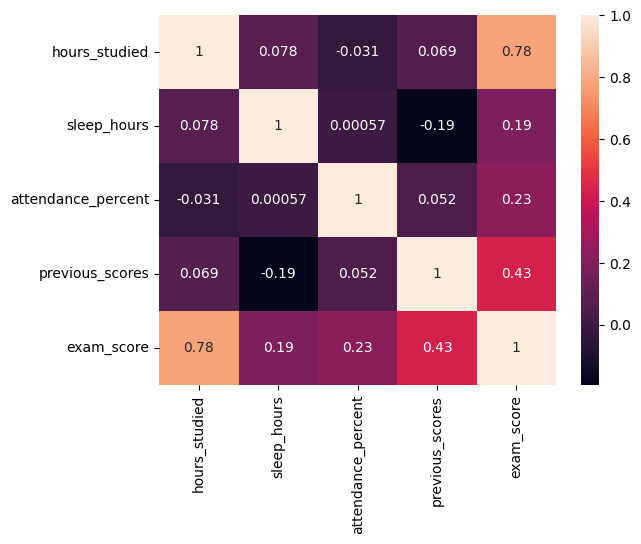

In [8]:
sns.heatmap(df.corr(), annot=True)

All values seem correlated with the target column.

In [9]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.5
    Uninstalling xgboost-3.0.5:
      Successfully uninstalled xgboost-3.0.5


In [10]:
from autoviz.AutoViz_Class import AutoViz_Class

av = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


Shape of your Data Set loaded: (200, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    5 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
hours_studied,float64,0.000000,NA,1.000000,12.000000,No issue
sleep_hours,float64,0.000000,NA,4.000000,9.000000,No issue
attendance_percent,float64,0.000000,NA,50.300000,100.000000,No issue
previous_scores,int64,0.000000,27,40.000000,95.000000,No issue
exam_score,float64,0.000000,NA,17.100000,51.300000,No issue


Number of All Scatter Plots = 10


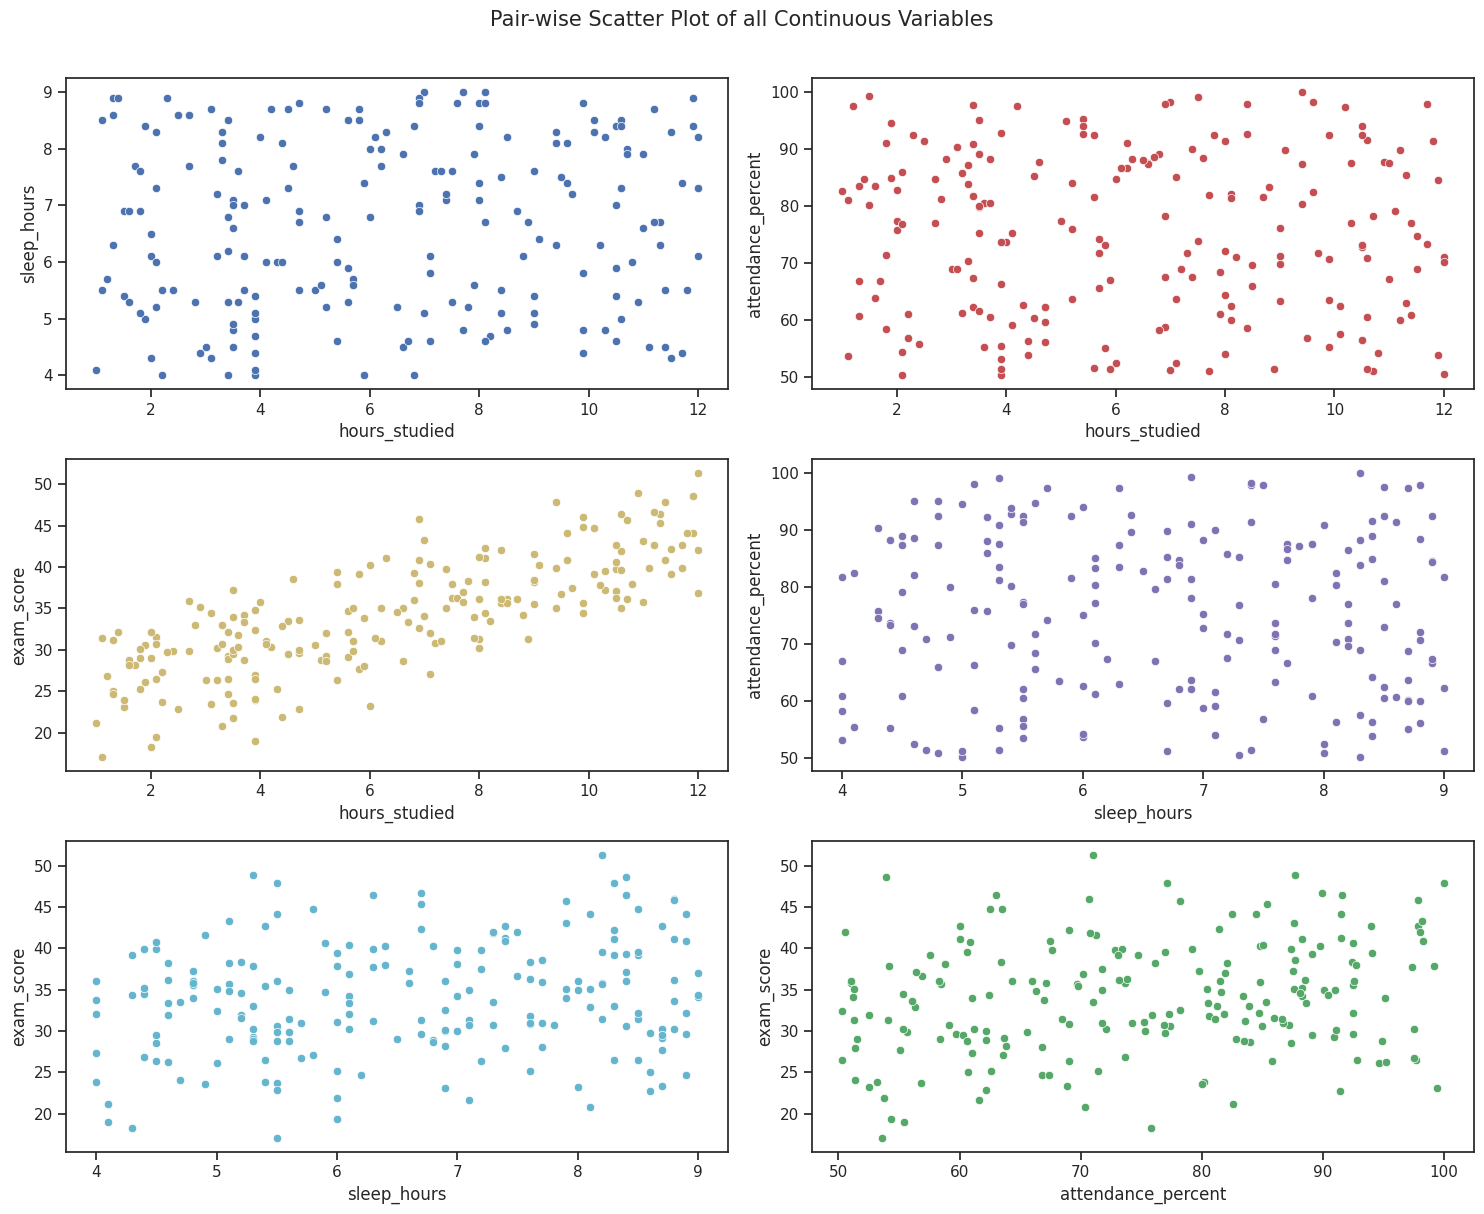

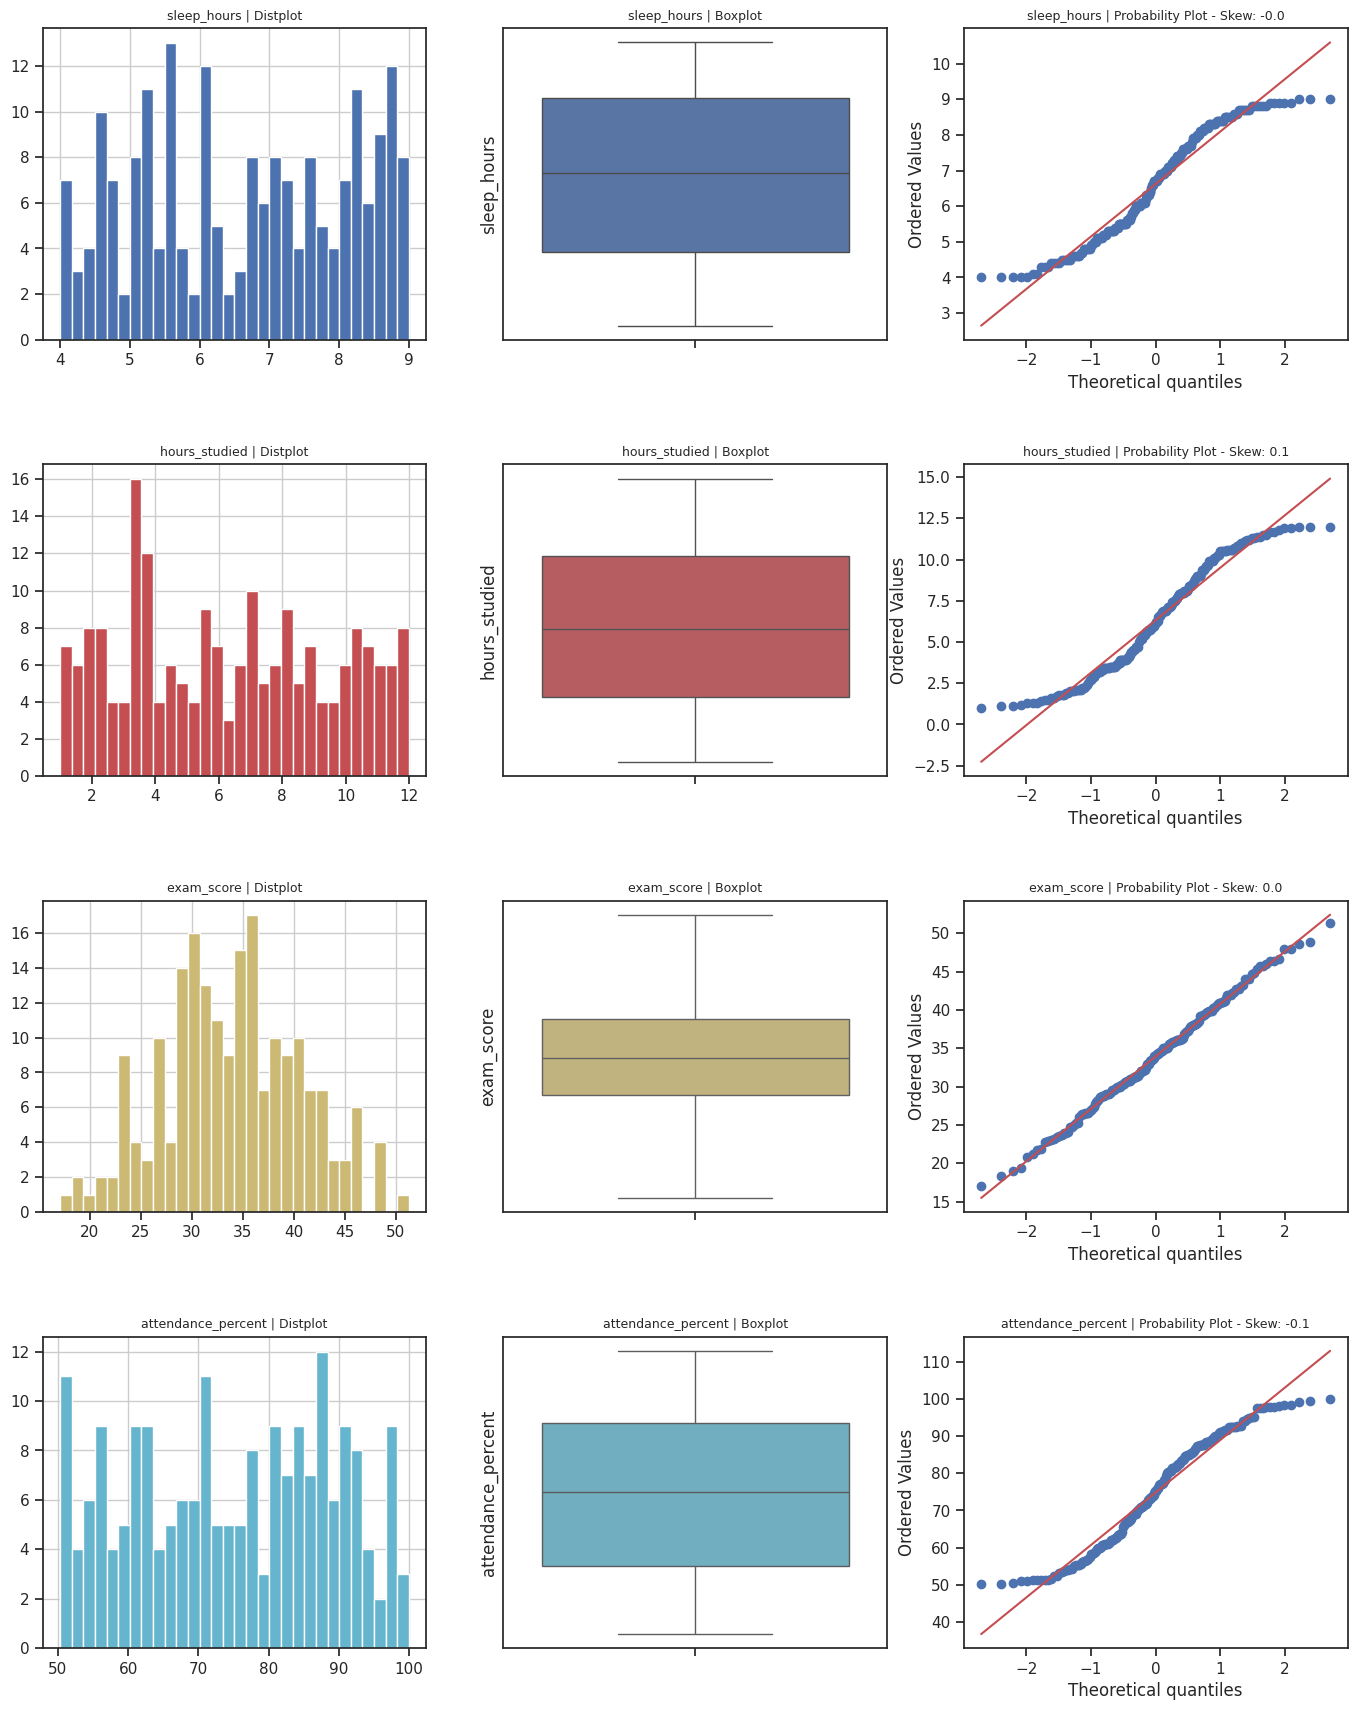

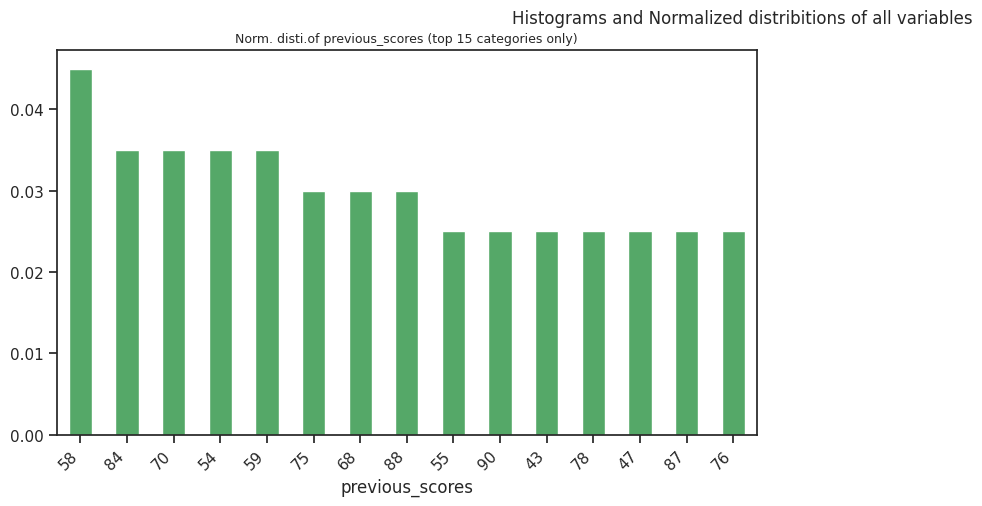

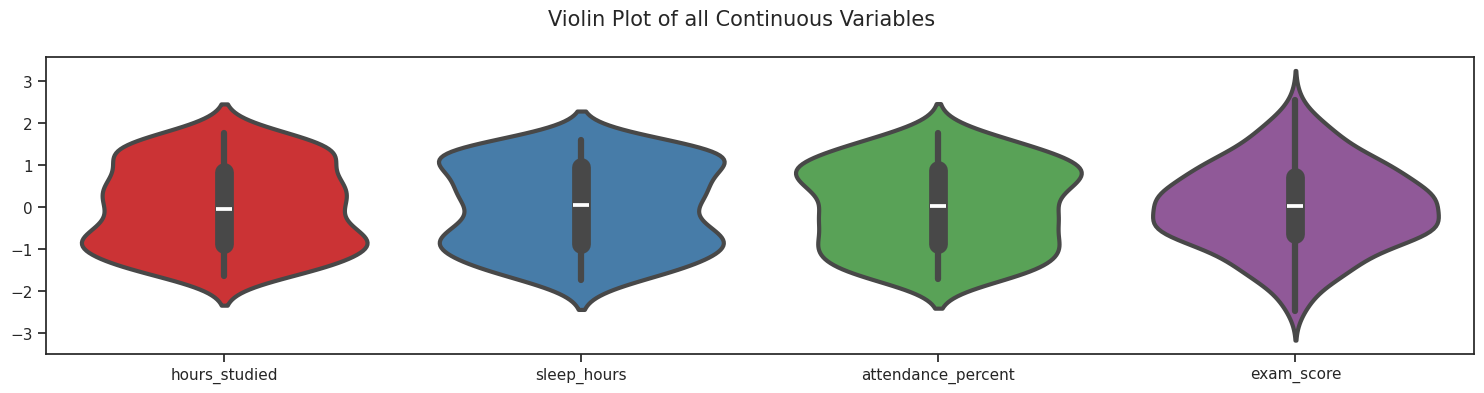

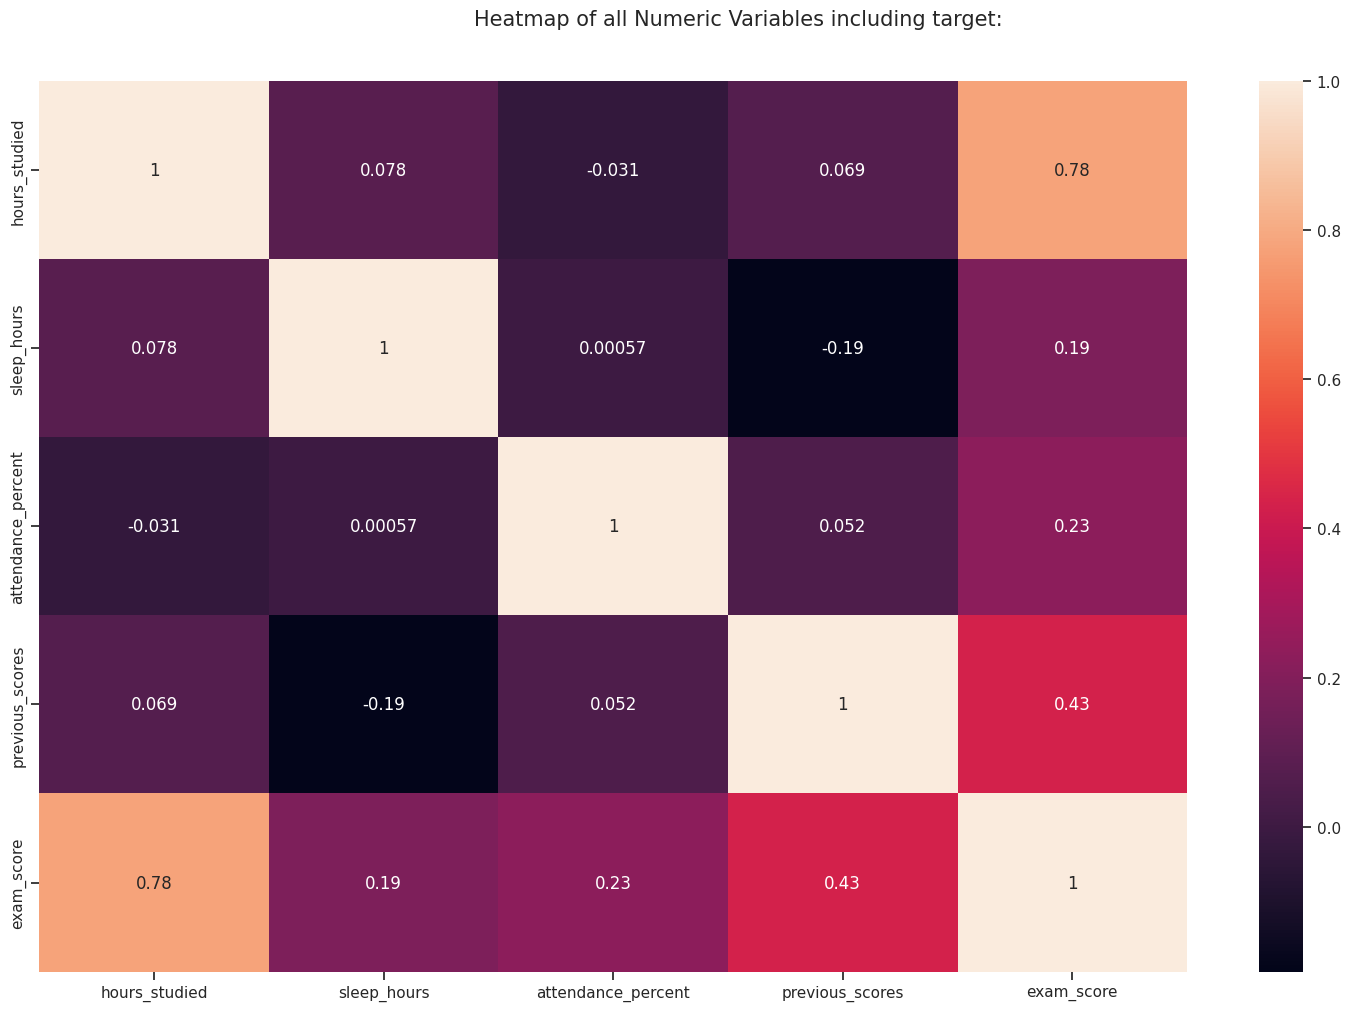

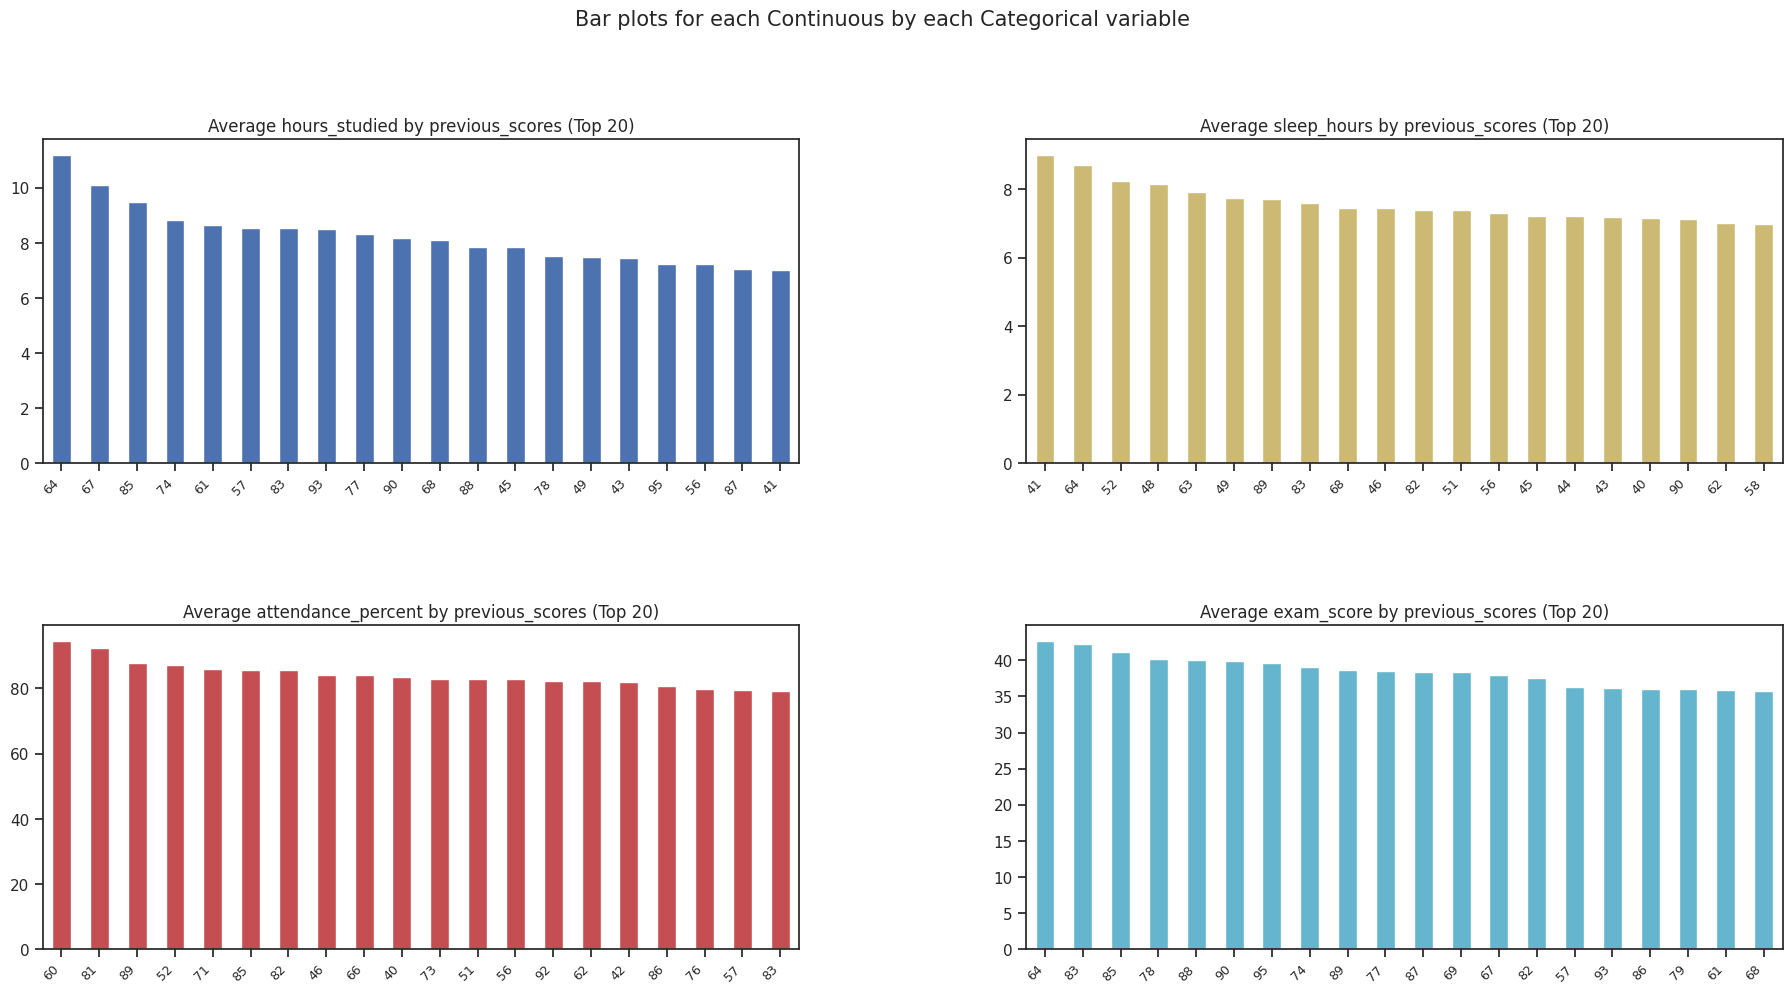

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [11]:
%matplotlib inline
data = av.AutoViz(
    df
)

# Fitting the models

In [12]:
X = df.drop(columns=['exam_score'])
y = df['exam_score']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [15]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

In [16]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train_scaled)
  y_pred_scaled = model.predict(X_test_scaled)
  y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  print(f"R² {name}:", r2)
  print(f"RMSE {name}:", rmse)
  print("\n")

R² Linear: 0.8468235970523806
RMSE Linear: 2.863008299249898


R² Ridge: 0.8475181722956557
RMSE Ridge: 2.856509797976473


R² Lasso: -0.03263127462465465
RMSE Lasso: 7.433602096968497




# Results
Since the dataset is not that complicated, I only used classical regression models. Linear regression came 1st, and Lasso came 3rd scorewise.